##  Fetch real-time cryptocurrency data

1. Install Required Libraries


In [3]:
!pip install requests pandas matplotlib

2 . Fetch Real-Time Crypto Prices
Now, fetch real-time prices using CoinGecko API.




📊 **Real-Time Crypto Prices:**
            id  current_price     market_cap  total_volume  \
0      bitcoin       84138.00  1668707369984   26373997024   
1     ethereum        1940.93   234074663499   11370020845   
2  binancecoin         627.35    91534950483    1740802036   

                      last_updated  
0 2025-03-17 22:16:10.633000+00:00  
1 2025-03-17 22:16:12.146000+00:00  
2 2025-03-17 22:16:12.083000+00:00  


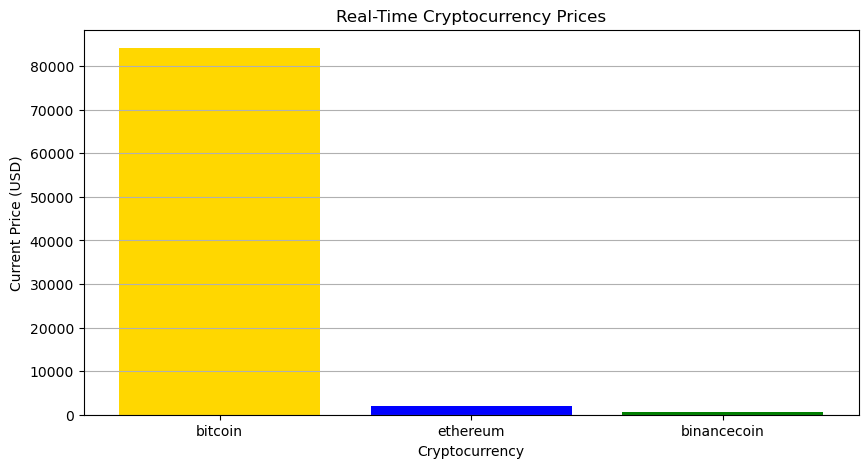

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# CoinGecko API URL
COINGECKO_API_URL = "https://api.coingecko.com/api/v3/coins/markets"

# Function to fetch real-time cryptocurrency data
def get_realtime_crypto_data(symbols=["bitcoin", "ethereum", "binancecoin"], currency="usd"):
    params = {
        "vs_currency": currency,
        "ids": ",".join(symbols),  # Comma-separated crypto IDs
        "order": "market_cap_desc",
        "per_page": len(symbols),
        "page": 1,
        "sparkline": False
    }
    
    response = requests.get(COINGECKO_API_URL, params=params)
    data = response.json()

    if isinstance(data, list):
        df = pd.DataFrame(data)[["id", "current_price", "market_cap", "total_volume", "last_updated"]]
        df["last_updated"] = pd.to_datetime(df["last_updated"])  # Convert timestamp
        return df
    else:
        print(f"❌ Error fetching data: {data}")
        return pd.DataFrame()

#  List of cryptocurrencies to fetch
crypto_symbols = ["bitcoin", "ethereum", "binancecoin"]

# Fetch crypto data
crypto_data = get_realtime_crypto_data(crypto_symbols)

# Display fetched data
print("\n📊 **Real-Time Crypto Prices:**")
print(crypto_data)

# Plot Real-Time Prices
if not crypto_data.empty:
    plt.figure(figsize=(10, 5))
    plt.bar(crypto_data["id"], crypto_data["current_price"], color=["gold", "blue", "green"])
    plt.xlabel("Cryptocurrency")
    plt.ylabel("Current Price (USD)")
    plt.title("Real-Time Cryptocurrency Prices")
    plt.grid(axis="y")
    plt.show()



📊 **Real-Time Crypto Prices:**
            id  current_price     market_cap  total_volume  \
0      bitcoin       84138.00  1668707369984   26373997024   
1     ethereum        1940.93   234074663499   11370020845   
2  binancecoin         627.35    91534950483    1740802036   

                      last_updated  
0 2025-03-17 22:16:10.633000+00:00  
1 2025-03-17 22:16:12.146000+00:00  
2 2025-03-17 22:16:12.083000+00:00  


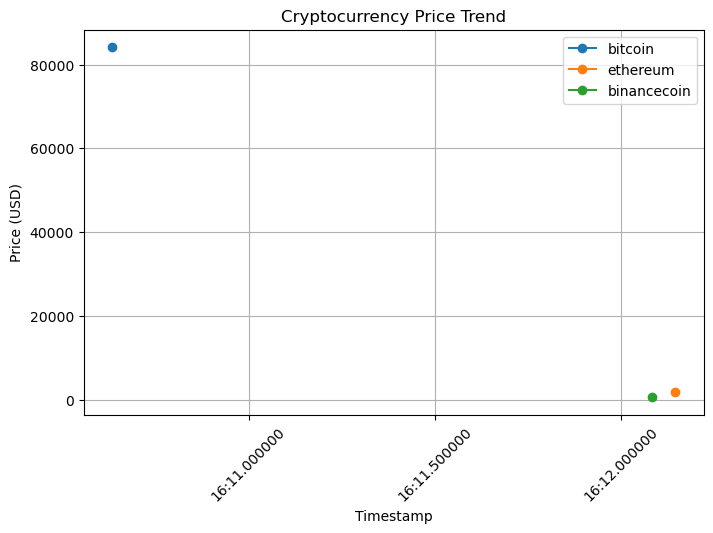

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CoinGecko API URL
COINGECKO_API_URL = "https://api.coingecko.com/api/v3/coins/markets"

# Function to fetch real-time cryptocurrency data
def get_realtime_crypto_data(symbols=["bitcoin", "ethereum", "binancecoin"], currency="usd"):
    params = {
        "vs_currency": currency,
        "ids": ",".join(symbols),
        "order": "market_cap_desc",
        "per_page": len(symbols),
        "page": 1,
        "sparkline": False
    }
    
    response = requests.get(COINGECKO_API_URL, params=params)
    data = response.json()

    if isinstance(data, list):
        df = pd.DataFrame(data)[["id", "current_price", "market_cap", "total_volume", "last_updated"]]
        df["last_updated"] = pd.to_datetime(df["last_updated"])
        return df
    else:
        print(f"❌ Error fetching data: {data}")
        return pd.DataFrame()

#  Fetch real-time crypto data
crypto_symbols = ["bitcoin", "ethereum", "binancecoin"]
crypto_data = get_realtime_crypto_data(crypto_symbols)

if crypto_data.empty:
    print("❌ No data available. Try again later.")
else:
    print("\n📊 **Real-Time Crypto Prices:**")
    print(crypto_data)

    

    #  Line Chart - Price Trends Over Time
    plt.figure(figsize=(8, 5))
    for i, row in crypto_data.iterrows():
        plt.plot(row["last_updated"], row["current_price"], marker="o", label=row["id"])
    
    plt.xlabel("Timestamp")
    plt.ylabel("Price (USD)")
    plt.title("Cryptocurrency Price Trend")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

    

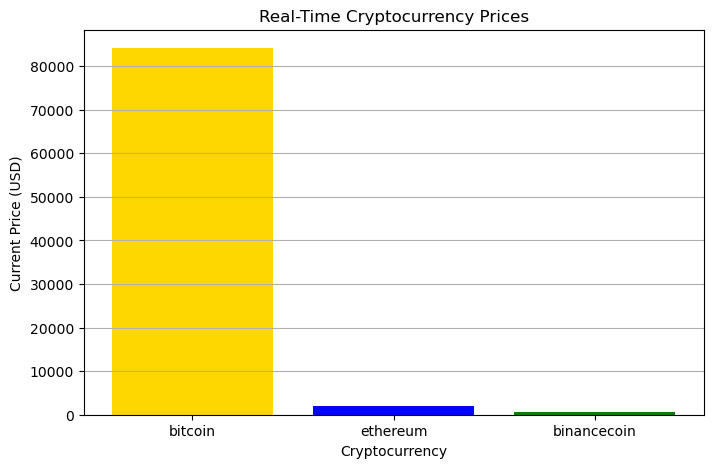

In [7]:
# Bar Chart: Compare Cryptocurrency Prices
plt.figure(figsize=(8, 5))
plt.bar(crypto_data["id"], crypto_data["current_price"], color=["gold", "blue", "green"])
plt.xlabel("Cryptocurrency")
plt.ylabel("Current Price (USD)")
plt.title("Real-Time Cryptocurrency Prices")
plt.grid(axis="y")
plt.show()

    

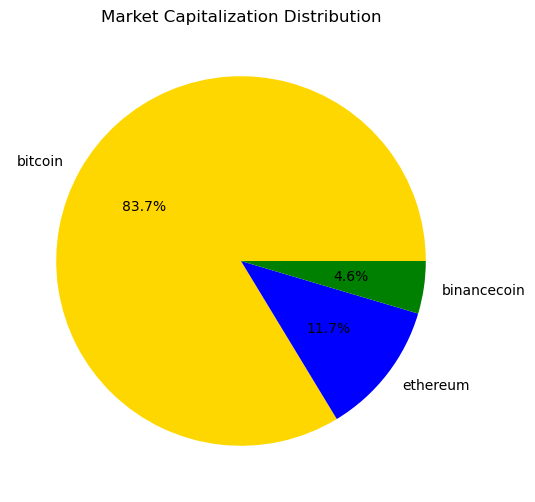

In [8]:
#  Pie Chart: Market Capitalization Share
plt.figure(figsize=(6, 6))
plt.pie(crypto_data["market_cap"], labels=crypto_data["id"], autopct="%1.1f%%", colors=["gold", "blue", "green"])
plt.title("Market Capitalization Distribution")
plt.show()

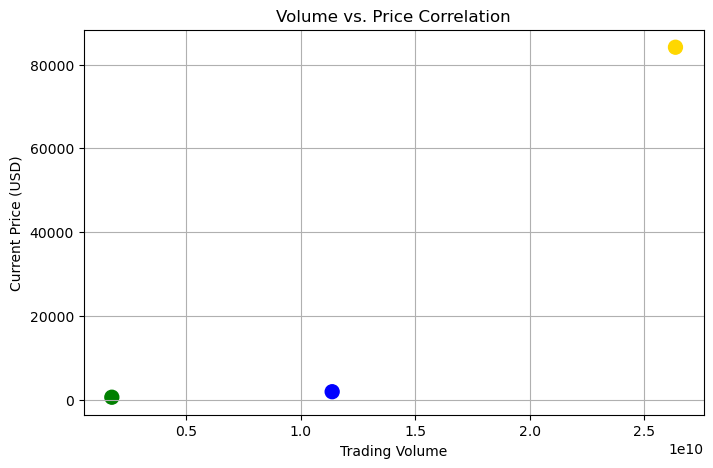

In [9]:
# Scatter Plot: Volume vs. Price
plt.figure(figsize=(8, 5))
plt.scatter(crypto_data["total_volume"], crypto_data["current_price"], color=["gold", "blue", "green"], s=100)
plt.xlabel("Trading Volume")
plt.ylabel("Current Price (USD)")
plt.title("Volume vs. Price Correlation")
plt.grid()
plt.show()

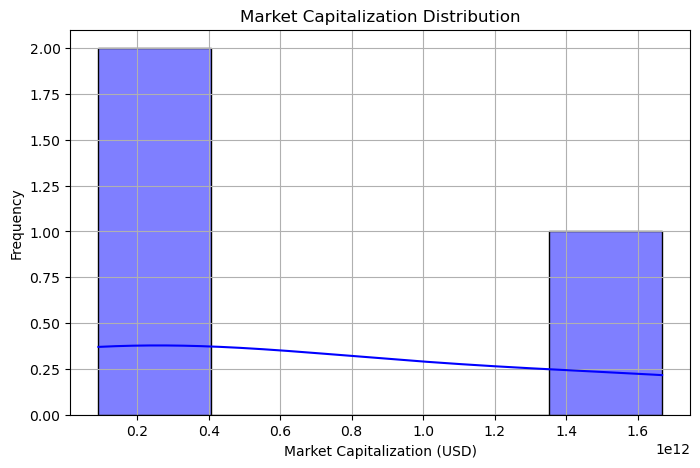

In [10]:
#  Histogram: Market Cap Distribution
plt.figure(figsize=(8, 5))
sns.histplot(crypto_data["market_cap"], bins=5, kde=True, color="blue")
plt.xlabel("Market Capitalization (USD)")
plt.ylabel("Frequency")
plt.title("Market Capitalization Distribution")
plt.grid()
plt.show()
